Satellite images are returned by Python AWIPS as grids, and can be rendered with Cartopy pcolormesh the same as gridded forecast models in other python-awips examples. 

### Available Sources, Creating Entities, Sectors, and Products

In [1]:
from awips.dataaccess import DataAccessLayer
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import datetime

# Create an EDEX data request
DataAccessLayer.changeEDEXHost("edex-beta.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest()
request.setDatatype("satellite")

# get optional identifiers for satellite datatype
identifiers = set(DataAccessLayer.getOptionalIdentifiers(request))

print("Available Identifiers:")
for id in identifiers:
    if id.lower() == 'datauri':
        continue
    print(" - " + id)

Available Identifiers:
 - creatingEntity
 - sectorID
 - physicalElement
 - source


In [2]:
# Show available sources
identifier = "source"
sources = DataAccessLayer.getIdentifierValues(request, identifier)
print(identifier + ":")
print(list(sources))

source:
['GTDO1', 'RBU', 'NSOF', 'RAMMB']


In [3]:
# Show available creatingEntities
identifier = "creatingEntity"
creatingEntities = DataAccessLayer.getIdentifierValues(request, identifier)
print(identifier + ":")
print(list(creatingEntities))

creatingEntity:
['GOES-16', 'GOES-18', 'GEOCOLR', 'CLDSNOW', 'DBRDUST']


In [4]:
# Show available sectorIDs
identifier = "sectorID"
sectorIDs = DataAccessLayer.getIdentifierValues(request, identifier)
print(identifier + ":")
print(list(sectorIDs))

sectorID:
['PRREGI', 'WCONUS', 'EMESO-2', 'EMESO-1', 'AKREGI', 'WMESO-1', 'WFD', 'WMESO-2', 'ECONUS', 'EFD']


In [5]:
# Contrust a full satellite product tree
for entity in creatingEntities:
    print(entity)
    request = DataAccessLayer.newDataRequest("satellite")
    request.addIdentifier("creatingEntity", entity)
    availableSectors = DataAccessLayer.getAvailableLocationNames(request)
    availableSectors.sort()
    for sector in availableSectors:
        print(" - " + sector)
        request.setLocationNames(sector)
        availableProducts = DataAccessLayer.getAvailableParameters(request)
        availableProducts.sort()
        for product in availableProducts:
            print("    - " + product)

GOES-16
 - ECONUS
    - ACTP
    - AOD
    - CAPE
    - CH-01-0.47um
    - CH-02-0.64um
    - CH-03-0.87um
    - CH-04-1.38um
    - CH-05-1.61um
    - CH-06-2.25um
    - CH-07-3.90um
    - CH-08-6.19um
    - CH-09-6.95um
    - CH-10-7.34um
    - CH-11-8.50um
    - CH-12-9.61um
    - CH-13-10.35um
    - CH-14-11.20um
    - CH-15-12.30um
    - CH-16-13.30um
    - COD
    - CPSD
    - CSM
    - CTH
    - CTP
    - DustHigh
    - DustLow
    - DustMed
    - FDC Area
    - FDC Power
    - FDC Temp
    - Fire_Mask
    - Fog_Depth
    - IFR_Fog_Prob
    - KI
    - LI
    - LIFR_Fog_Prob
    - LST
    - MVFR_Fog_Prob
    - SI
    - SmokeHigh
    - SmokeLow
    - SmokeMed
    - TPW
    - TT
    - VMP-1014.00hPa
    - VMP-103.00hPa
    - VMP-151.30hPa
    - VMP-20.92hPa
    - VMP-201.00hPa
    - VMP-247.40hPa
    - VMP-29.12hPa
    - VMP-300.00hPa
    - VMP-359.00hPa
    - VMP-407.50hPa
    - VMP-459.70hPa
    - VMP-496.60hPa
    - VMP-51.53hPa
    - VMP-535.20hPa
    - VMP-555.20hPa
    - VMP-5

    - CH-01-0.47um
    - CH-02-0.64um
    - CH-03-0.87um
CLDSNOW
 - ECONUS
    - CH-01-0.47um
    - CH-02-0.64um
    - CH-03-0.87um
 - WCONUS
    - CH-01-0.47um
    - CH-02-0.64um
    - CH-03-0.87um
DBRDUST
 - ECONUS
    - CH-01-0.47um
    - CH-02-0.64um
    - CH-03-0.87um


##  GOES 16 Mesoscale Sectors

Define our imports, and define our map properties first. 

Latest image available: 2023-06-12 18:10:28 (0.008333333333333333hr 0.0m ago)
Image grid size: (500, 500)
Image grid extent: [-107.76901, -90.10833, 28.13906, 41.192417]
Latest image available: 2023-06-12 18:09:55 (0.018055555555555554hr 0.0m ago)
Image grid size: (500, 500)
Image grid extent: [-86.008026, -73.23775, 29.301891, 41.90263]


/Users/scarter/opt/miniconda3/envs/python3-awips/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


<Figure size 1152x1008 with 0 Axes>

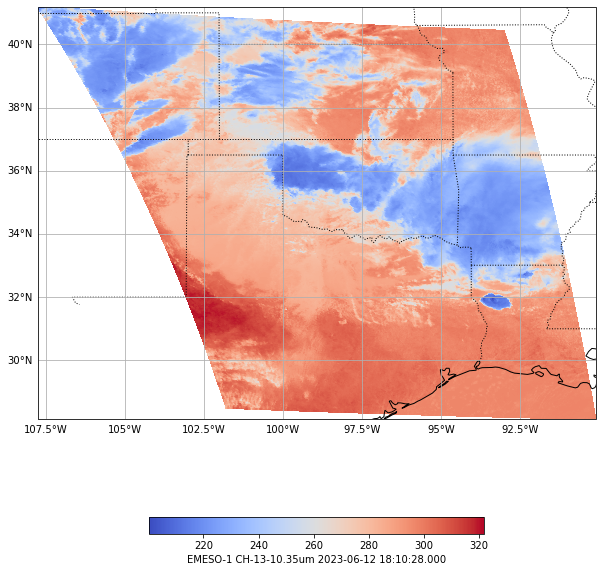

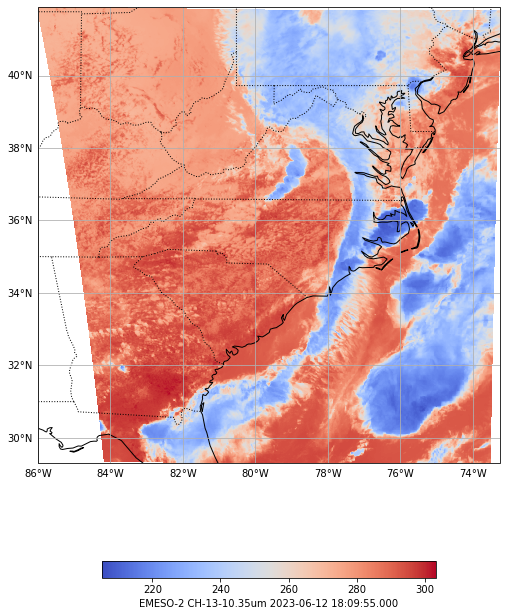

In [6]:
%matplotlib inline

def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(10,12),
            subplot_kw=dict(projection=projection))
    if bbox[0] is not np.nan:
        ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

sectors = ["EMESO-1","EMESO-2"]
fig = plt.figure(figsize=(16,7*len(sectors)))

for i, sector in enumerate(sectors):

    request = DataAccessLayer.newDataRequest()
    request.setDatatype("satellite")
    request.setLocationNames(sector)
    request.setParameters("CH-13-10.35um")

    utc = datetime.datetime.utcnow()
    times = DataAccessLayer.getAvailableTimes(request)
    hourdiff = utc - datetime.datetime.strptime(str(times[-1]),'%Y-%m-%d %H:%M:%S')
    hours,days = hourdiff.seconds/3600,hourdiff.days
    minute = str((hourdiff.seconds - (3600 * hours)) / 60)
    offsetStr = ''
    if hours > 0:
        offsetStr += str(hours) + "hr "
    offsetStr += str(minute) + "m ago"
    if days > 1:
        offsetStr = str(days) + " days ago"

    response = DataAccessLayer.getGridData(request, [times[-1]])
    grid = response[0]
    data = grid.getRawData()
    lons,lats = grid.getLatLonCoords()
    bbox = [lons.min(), lons.max(), lats.min(), lats.max()]

    print("Latest image available: "+str(times[-1]) + " ("+offsetStr+")")
    print("Image grid size: " + str(data.shape))
    print("Image grid extent: " + str(list(bbox)))

    fig, ax = make_map(bbox=bbox)
    states = cfeat.NaturalEarthFeature(category='cultural',
                                        name='admin_1_states_provinces_lines',
                                        scale='50m', facecolor='none')
    ax.add_feature(states, linestyle=':')
    cs = ax.pcolormesh(lons, lats, data, cmap='coolwarm')
    cbar = fig.colorbar(cs, shrink=0.6, orientation='horizontal')
    cbar.set_label(sector + " " + grid.getParameter() + " " \
    + str(grid.getDataTime().getRefTime()))